<a href="https://colab.research.google.com/github/Manohar1805/rice_img_classification/blob/main/rice_datataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"manoharacv","key":"de7e335e66ca7b2f31b1b96aba007677"}'}

In [ ]:
 ! mkdir ~/.kaggle 

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                             title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                        480KB  2023-01-04 12:50:31           4136        153  1.0              
senapatirajesh/netflix-tv-shows-and-movies                      Latest Netflix TV shows and movies                  1MB  2023-01-14 17:03:12            956         30  0.88235295       
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022                   621KB  2023-01-02 20:10:36           2000         68  1.0              
johnny1994/divorce-rates-data-should-you-get-married            Divorc

In [ ]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

100% 219M/219M [00:07<00:00, 38.2MB/s]
100% 219M/219M [00:07<00:00, 29.3MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/drive/MyDrive/datasets/rice-image-dataset.zip','r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio('/content/Rice_Image_Dataset',output='/content/2split',seed=42,ratio=(0.8,0.2))

Copying files: 75000 files [00:10, 7393.17 files/s]


In [ ]:

import os

for dirpath, dirname,filename in os.walk('/content/2split'):
  print(f'There are {len(dirname)} folders and {len(filename)} in {dirpath}')

There are 2 folders and 0 in /content/2split
There are 5 folders and 0 in /content/2split/train
There are 0 folders and 12000 in /content/2split/train/Jasmine
There are 0 folders and 12000 in /content/2split/train/Basmati
There are 0 folders and 12000 in /content/2split/train/Karacadag
There are 0 folders and 12000 in /content/2split/train/Ipsala
There are 0 folders and 12000 in /content/2split/train/Arborio
There are 5 folders and 0 in /content/2split/val
There are 0 folders and 3000 in /content/2split/val/Jasmine
There are 0 folders and 3000 in /content/2split/val/Basmati
There are 0 folders and 3000 in /content/2split/val/Karacadag
There are 0 folders and 3000 in /content/2split/val/Ipsala
There are 0 folders and 3000 in /content/2split/val/Arborio


In [ ]:
import pathlib
import numpy as np
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [ ]:
def view_random_img(target_dir,target_class):
  target_folder=target_dir+'/'+target_class
  random_image=random.sample(os.listdir(target_folder),1)

  img=mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(f"image shape:{img.shape}")
  return img


image shape:(250, 250, 3)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

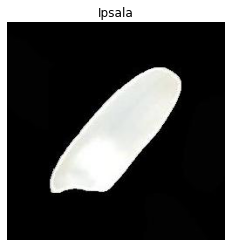

In [ ]:
view_random_img('/content/2split/train','Ipsala')

In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_dir='/content/2split/train/'
test_dir='/content/2split/val/'

train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=256,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             seed=42)
test_data=test_datagen.flow_from_directory(test_dir,
                                           batch_size=256,
                                           target_size=(224,224),
                                           class_mode='categorical')

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [ ]:
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='softmax')
])

In [ ]:
model_1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
history_1=model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 155s 604ms/step - loss: 0.1892 - accuracy: 0.9395 - val_loss: 0.0607 - val_accuracy: 0.9815
Epoch 2/5
235/235 [==============================] - 137s 582ms/step - loss: 0.0472 - accuracy: 0.9843 - val_loss: 0.0417 - val_accuracy: 0.9869
Epoch 3/5
235/235 [==============================] - 135s 574ms/step - loss: 0.0394 - accuracy: 0.9869 - val_loss: 0.0362 - val_accuracy: 0.9885
Epoch 4/5
235/235 [==============================] - 135s 575ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.0386 - val_accuracy: 0.9882
Epoch 5/5
235/235 [==============================] - 137s 582ms/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.0641 - val_accuracy: 0.9778


In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
     

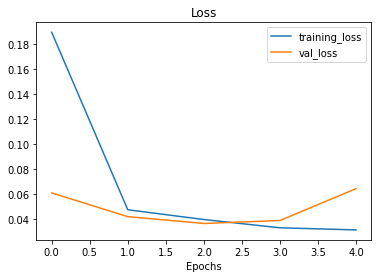

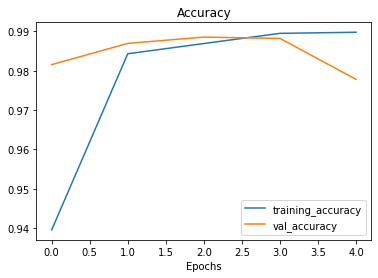

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_2=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                optimizer="RMSprop",
                metrics=['accuracy'])

history_2=model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 136s 574ms/step - loss: 0.2306 - accuracy: 0.9180 - val_loss: 0.0882 - val_accuracy: 0.9715
Epoch 2/5
235/235 [==============================] - 133s 567ms/step - loss: 0.0919 - accuracy: 0.9702 - val_loss: 0.0946 - val_accuracy: 0.9671
Epoch 3/5
235/235 [==============================] - 133s 564ms/step - loss: 0.0729 - accuracy: 0.9761 - val_loss: 0.0791 - val_accuracy: 0.9758
Epoch 4/5
235/235 [==============================] - 133s 564ms/step - loss: 0.0671 - accuracy: 0.9790 - val_loss: 0.0460 - val_accuracy: 0.9854
Epoch 5/5
235/235 [==============================] - 132s 562ms/step - loss: 0.0477 - accuracy: 0.9845 - val_loss: 0.0366 - val_accuracy: 0.9891


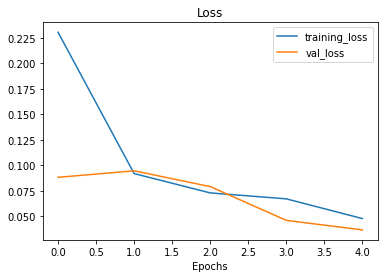

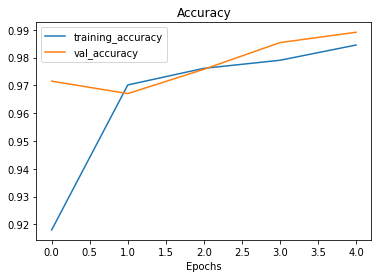

In [ ]:
plot_loss_curves(history_2)

In [ ]:
import datetime

In [ ]:
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir= dir_name+'/'+experiment_name+'/'+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f'savings tensorboard log files to : {log_dir}')
  return tensorboard_callback

In [ ]:
#import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
IMG_SHAPE=(224,224)
BATCH_SIZE=32

In [ ]:
def create_model(model_url,num_classes=10):
  feature_extroctor_layer=hub.KerasLayer(model_url,
                                         trainable=False,
                                         name='feature extraction layer',
                                         input_shape=IMG_SHAPE+(3,))
  model=tf.keras.Sequential([
      feature_extroctor_layer,
      layers.Dense(num_classes,activation='softmax',name='output_layer')

  ])
  return model

In [ ]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMG_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

In [ ]:
resnet_model=create_model(resnet_url,5)



In [ ]:
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy']
                     )

In [ ]:

resnet_history=resnet_model.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=len(test_data),
                                callbacks=[create_tensorboard_callback(dir_name='tensorflow hub',
                                                                       experiment_name='resnet50v2')]
                                )

savings tensorboard log files to : tensorflow hub/resnet50v2/20230123-151414
Epoch 1/5
235/235 [==============================] - 233s 953ms/step - loss: 0.1632 - accuracy: 0.9517 - val_loss: 0.0659 - val_accuracy: 0.9822
Epoch 2/5
235/235 [==============================] - 217s 922ms/step - loss: 0.0539 - accuracy: 0.9850 - val_loss: 0.0444 - val_accuracy: 0.9872
Epoch 3/5
235/235 [==============================] - 217s 923ms/step - loss: 0.0411 - accuracy: 0.9885 - val_loss: 0.0370 - val_accuracy: 0.9893
Epoch 4/5
235/235 [==============================] - 221s 938ms/step - loss: 0.0348 - accuracy: 0.9903 - val_loss: 0.0352 - val_accuracy: 0.9901
Epoch 5/5
235/235 [==============================] - 217s 924ms/step - loss: 0.0308 - accuracy: 0.9913 - val_loss: 0.0304 - val_accuracy: 0.9912


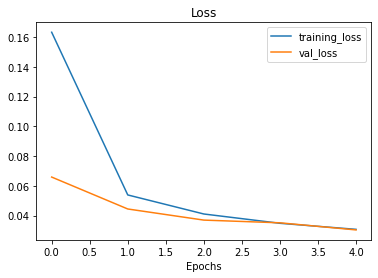

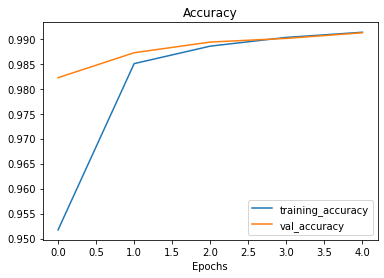

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
eff_model=create_model(efficientnet_url,5)

eff_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy']
                     )


eff_history=eff_model.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=len(test_data),
                                callbacks=[create_tensorboard_callback(dir_name='tensorflow hub',
                                                                       experiment_name='effnet')]
                                )

savings tensorboard log files to : tensorflow hub/effnet/20230123-153539
Epoch 1/5
235/235 [==============================] - 165s 661ms/step - loss: 0.2707 - accuracy: 0.9479 - val_loss: 0.0877 - val_accuracy: 0.9849
Epoch 2/5
235/235 [==============================] - 152s 645ms/step - loss: 0.0700 - accuracy: 0.9866 - val_loss: 0.0522 - val_accuracy: 0.9895
Epoch 3/5
235/235 [==============================] - 152s 646ms/step - loss: 0.0475 - accuracy: 0.9896 - val_loss: 0.0393 - val_accuracy: 0.9915
Epoch 4/5
235/235 [==============================] - 152s 648ms/step - loss: 0.0373 - accuracy: 0.9917 - val_loss: 0.0320 - val_accuracy: 0.9928
Epoch 5/5
235/235 [==============================] - 152s 645ms/step - loss: 0.0312 - accuracy: 0.9928 - val_loss: 0.0274 - val_accuracy: 0.9939


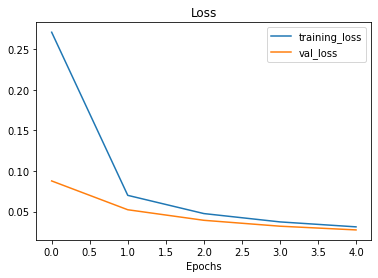

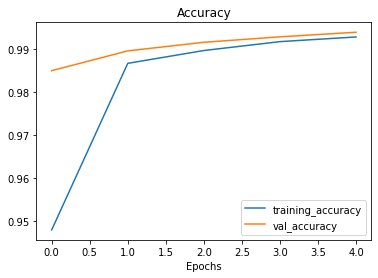

In [ ]:
plot_loss_curves(eff_history)